In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
from sklearn.datasets import load_iris

In [14]:
import seaborn as sns
df=sns.load_dataset('tips')

In [15]:
df.

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [16]:
X=df[['size','total_bill']]
y=df.tip

In [17]:
from sklearn.svm import SVR

In [18]:
model=SVR(kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    tol=0.001,
    C=1.0,
    epsilon=0.1,
    shrinking=True,
    cache_size=200,
    verbose=False,
    max_iter=-1)

In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.20,random_state=21)

In [21]:
model.fit(xtrain,ytrain)

SVR()

In [22]:
ypred=model.predict(xtest)

In [24]:
from sklearn.metrics import mean_squared_error as mse

In [25]:
error=mse(ytest,ypred)
error

0.6326953021103954

In [ ]:
# 

In [26]:
df = pd.read_csv('Position_Salaries.csv')

In [27]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [28]:
df.tail()

,Position,Level,Salary
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [29]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [30]:
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [32]:
df.dtypes

Position    object
Level        int64
Salary       int64
dtype: object

In [31]:
df.head(2)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000


In [33]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [34]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [35]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [36]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)

In [37]:
from sklearn.svm import SVR
model = SVR(kernel='poly')
model.fit(X, y)

SVR(kernel='poly')

In [38]:
y_pred = model.predict([[6.5]])

In [39]:
print(y_pred)

[133549.23899557]


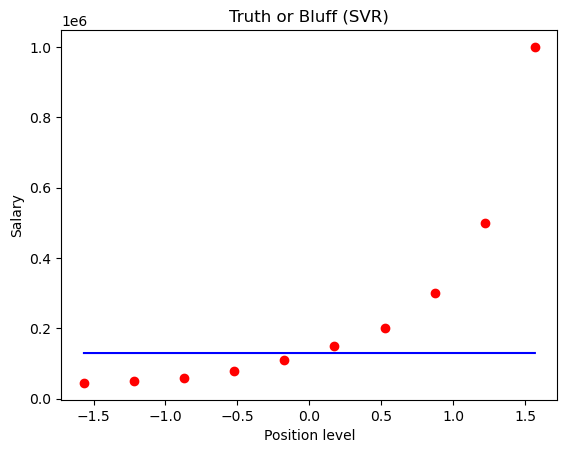

In [40]:
plt.scatter(X, y, color = 'red')
plt.plot(X, model.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

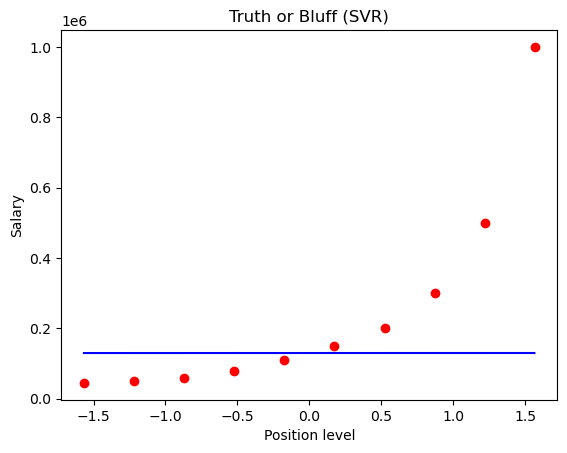

In [41]:
X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, model.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

#### SVM- A guide to beginners AnalyticsVidya

In [42]:
# What is a SVM?

its a supervised machine learning algorithm that tries to find the best hyperplane to separate two classes.

In [43]:
# what is the diffrence between SVM and Logistic Regression??

Both the algorithms try to find the best hyperplane, 

but the main difference is logistic regression is a probabilistic approach whereas support vector machine is based on statistical approaches.

In [44]:
# # When to use logistic regression vs Support vector machine?

SVM works best when the dataset is small and complex. It is usually advisable to first use logistic regression and see how does it performs, if it fails to give a good accuracy you can go for SVM without any kernel

Logistic regression and SVM without any kernel have similar performance but depending on your features, one may be more efficient than the other.

In [45]:
# Types of Support Vector Machine

Linear SVM:

    When the data is perfectly linearly separable only then we can use Linear SVM. Perfectly linearly separable means that the data points can be classified into 2 classes by using a single straight line(if 2D).

Non-Linear SVM:

        When the data is not linearly separable then we can use Non-Linear SVM, which means when the data points cannot be separated into 2 classes by using a straight line (if 2D) then we use some advanced techniques like kernel tricks to classify them.

In [46]:
# # terminologies in SVM

WHAT ARE SUPPORT VECTORS??

These are the points that are closest to the hyperplane. 
A separating line will be defined with the help of these data points.

WHAT IS MARGIN? DEFINE HARD MARGIN AND SOFT MARGIN?

Margin is the distance between the hyperplane and support vectors. In SVM large margin is considered a good margin. There are two types of margins hard margin and soft margin.

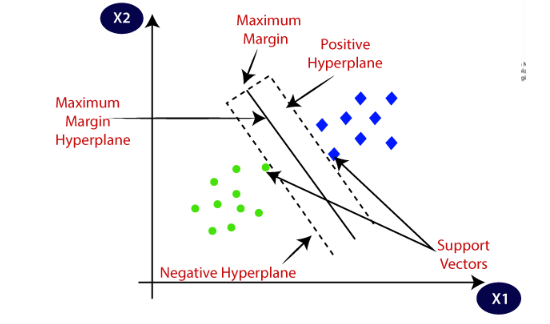

In [47]:
### How does Support Vector Machine work?

-it tries to find the best hyperplane recursively untill it has maximum margin from both the classes.
-there can be drwan many hyperplane through two classes in order to separate them.

In [48]:
# why those points are called support vectors??

Those points are called support vectors because they are contributing towards development of the algorithm.

In [49]:
# # If a data point is not an SV, removing it has no effect on the model.

In [50]:
# What will happen if we delete the support vector?

Deleting the SV will then change the position of the hyperplane.

In [51]:
# How do we define the dimension of the hyperplane??

The dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. It becomes difficult to imagine when the number of features exceeds 3.

In [52]:
from sklearn.svm import SVC,SVR

In [53]:
# What is soft margin in Support Vector Machine Algorithm? Define Margin Violation in SVM?

As most of the real-world data are not fully linearly separable, we will allow some margin violation to occur which is called soft margin classification.

It is better to have a large margin, even though some constraints are violated. 

Margin violation means choosing a hyperplane. Which can allow some data points to stay on either the incorrect side of the hyperplane and between the margin and correct side of the hyperplane.

In [54]:
### Basic Parameters for SVM – (Dramatic/Side portion) (both linear and non-linear SVMs)

In [55]:
svm=SVC(C=1.0,
        kernel='rbf',
        degree=3,
        gamma='scale',
        coef0=0.0,
        shrinking=True,
        probability=False,
        tol=0.001,
        cache_size=200,
        class_weight=None,
        verbose=False,
        max_iter=-1,
        decision_function_shape='ovr',
        break_ties=False,
        random_state=None,)

Regularization parameter (C): 
- Penalty parameter of the error term.
- or degree of optimization 
- in a simple word, it suggests the model choose data points as a support vector
- For large C – then model choose more data points as a support vector and we get the higher variance and lower bias, which may lead to the problem of overfitting.

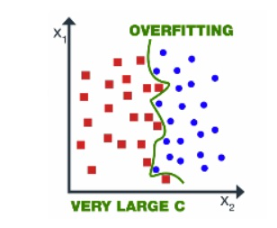

For small C – If the value of C is small then the model chooses fewer data points as a support vector and gets lower variance/high bias.

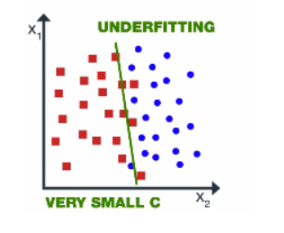

In [56]:
# Gamma Parameter: 

- used with Gaussian RBF kernel.
- If we are useing linear or polynomial kernel then we do not need GAMMA parameter, only C hypermeter is used.
- It decides that how much curvature we want in a decision boundary.
- High Gamma value – More curvature, Low Gamma value – Less curvature

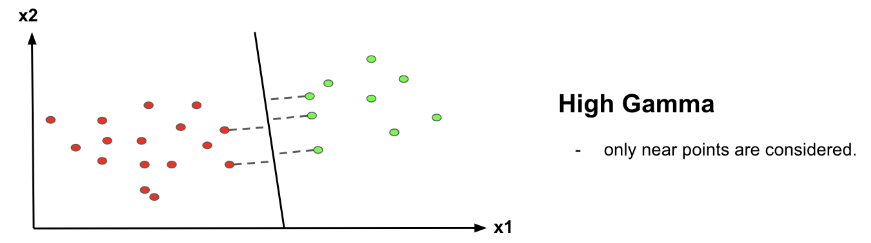

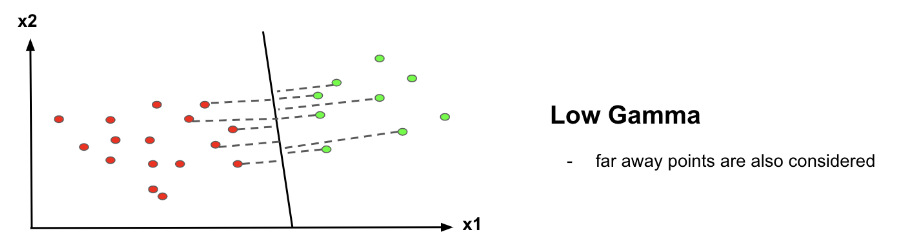

In [57]:
# Kernel

    We choose svm kernel based on our dataset type, if it has linear pattern w.r.t target then we use linear kernel else we use.. non linear kernel..

    linear kernel='linear'
    non-linear kernel= ‘rbf’, ‘poly’ and ‘sigmoid’

In [58]:
# Degree:

1. It controls the flexibility of the decision boundary.
2. Higher degrees yield more flexible decision boundaries.
3. Highly recommended for polynomial kernel

In [59]:
# Random State:

This particular parameter, 50-50 people use it and others won’t. This is not so important, ensures that the splits that you generate are reproducible, like we give mostly the value as 0 or 1 or it may be any other number too.